# ITD214 Assignment – Applied Data Science Project
Student ID:  	6067792V                                               
Name:		Soe Lai Nwe

•	This data set is collected from Kaggle https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

- Below are Data preparation, cleaning , data exploration and modelling technique selection

# Import libraries and download the packages

In [1]:
# Enter code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string

In [2]:
# Read in combines reviews file
filepath= "D:/2024/NYP Applied Data Science/ITD 214/#Sephora Product and skincare reviews/combined_reviews.csv"
df = pd.read_csv(filepath,encoding='latin-1')
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25444\3948632449.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,encoding='latin-1')


,Column0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [3]:
columns_to_drop = ["Column0","helpfulness","total_feedback_count","skin_tone","eye_color","skin_type","hair_color"]
df = df.drop(columns=columns_to_drop)

In [4]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
df.shape

(1094411, 12)

In [6]:
# find completely deplicate rows 
duplicate_all_columns = df[df.duplicated()]

In [7]:
# Display the number of duplicated rows
print(f"Number of duplicate rows:{duplicate_all_columns.shape[0]}")

Number of duplicate rows:242


In [8]:
print(duplicate_all_columns["rating"])

5339       5
5477       5
7242       5
7244       5
7911       5
          ..
994985     5
1014797    5
1049735    5
1058245    5
1070403    5
Name: rating, Length: 242, dtype: int64


In [9]:
# Statistics on our numeric columns
df.describe()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,926423.000000,1.094411e+06,1.094411e+06,1.094411e+06
mean,4.299158e+00,0.839962,8.948695e-01,3.282257e+00,4.900838e+01
std,1.149444e+00,0.366642,5.288943e+00,1.967482e+01,4.004338e+01
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.000000e+00
25%,4.000000e+00,1.000000,0.000000e+00,0.000000e+00,2.500000e+01
50%,5.000000e+00,1.000000,0.000000e+00,0.000000e+00,3.900000e+01
75%,5.000000e+00,1.000000,1.000000e+00,3.000000e+00,6.200000e+01
max,5.000000e+00,1.000000,1.159000e+03,5.050000e+03,1.900000e+03


In [10]:
df.shape

(1094411, 12)

In [11]:
df.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [12]:
# Lets see how these records with missing is_recommended
df.loc[df['is_recommended'].isna()].head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
15900,1296660394,4,NaN,0,0,2017-08-23,Not the most moisturizing mask I have tried. T...,love the taste/scent,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15901,1086759071,5,NaN,18,156,2017-08-22,This stuff is a miracle worker. I love lipstic...,I can wear lipstick again!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15902,2433933866,5,NaN,0,0,2017-08-22,This is a game changer. I have tried other ove...,HG for life,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15903,5944955520,5,NaN,0,0,2017-08-21,Oh my lanta. There are no words to describe ho...,My Lips Have Never Been Softer,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15904,1043341645,3,NaN,0,0,2017-08-21,While this stuff feels great on your lips and ...,Good but not great,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [13]:
# Number of records before dropping our missing values
df.shape

(1094411, 12)

# Removing Null values

In [14]:
# Let's drop these records since we can't build our required matrixes 
df = df.dropna(subset=['is_recommended'])

In [15]:
# Number of records after dropping our missing values
df.shape

(926423, 12)

In [16]:
df.describe()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000
mean,4.288943,0.839962,0.917260,3.222982,50.035459
std,1.154414,0.366642,5.351072,19.665801,41.065237
min,1.000000,0.000000,0.000000,0.000000,3.000000
25%,4.000000,1.000000,0.000000,0.000000,25.000000
50%,5.000000,1.000000,0.000000,0.000000,40.000000
75%,5.000000,1.000000,1.000000,3.000000,65.000000
max,5.000000,1.000000,1159.000000,5050.000000,1900.000000


In [17]:
# View a summary of our data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  926423
Columns  :  12

Features : 
 ['author_id', 'rating', 'is_recommended', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'product_id', 'product_name', 'brand_name', 'price_usd']

Missing values :   292044

Unique values :  
 author_id                   450697
rating                           5
is_recommended                   2
total_neg_feedback_count       244
total_pos_feedback_count       551
submission_time               2035
review_text                 811588
review_title                305080
product_id                    2351
product_name                  2334
brand_name                     142
price_usd                      221
dtype: int64


In [18]:
df.to_csv("df_rating.csv")

In [19]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Button
import ipywidgets as widgets
from datetime import datetime

# Constructs a DATETIME value

In [21]:
from datetime import datetime

In [22]:
df['submission_time'] = pd.to_datetime(df['submission_time']) #format='%Y/%d/%m'

In [23]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['Year'] = df['submission_time'].dt.year
df['Month'] = df['submission_time'].dt.month
df['Date'] = df['submission_time'].dt.day

In [24]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,1741593524,5,1.0,0,2,2023-02-01,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1
1,31423088263,1,0.0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
2,5061282401,5,1.0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
3,6083038851,5,1.0,0,0,2023-03-20,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20
4,47056667835,5,1.0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20


In [25]:
df= df.drop(columns="submission_time")

In [26]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,1741593524,5,1.0,0,2,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
2,5061282401,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
3,6083038851,5,1.0,0,0,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20
4,47056667835,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20


In [27]:
df.describe()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
count,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000,926423.000000
mean,4.288943,0.839962,0.917260,3.222982,50.035459,2020.344239,5.942242,15.735485
std,1.154414,0.366642,5.351072,19.665801,41.065237,1.495114,3.415409,8.645039
min,1.000000,0.000000,0.000000,0.000000,3.000000,2017.000000,1.000000,1.000000
25%,4.000000,1.000000,0.000000,0.000000,25.000000,2019.000000,3.000000,8.000000
50%,5.000000,1.000000,0.000000,0.000000,40.000000,2020.000000,6.000000,16.000000
75%,5.000000,1.000000,1.000000,3.000000,65.000000,2022.000000,9.000000,23.000000
max,5.000000,1.000000,1159.000000,5050.000000,1900.000000,2023.000000,12.000000,31.000000


In [28]:
#unique,counts = np.unique(df['product_id'], return_counts=True)
#relation_count = dict(zip(unique,counts))

In [29]:
#print(relation_count)

In [30]:
df_itemid = pd.value_counts(df['rating'])
df_itemid

C:\Users\Dell\AppData\Local\Temp\ipykernel_25444\772214134.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_itemid = pd.value_counts(df['rating'])


rating
5    587081
4    170192
3     71395
1     52493
2     45262
Name: count, dtype: int64

<Axes: xlabel='rating'>

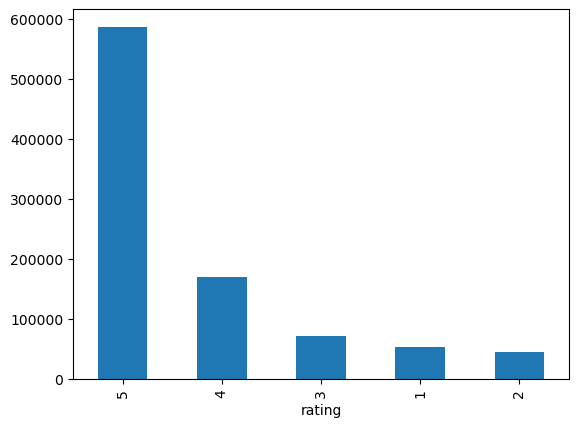

In [31]:
#rating count bar graph
df['rating'].value_counts().plot(kind='bar')

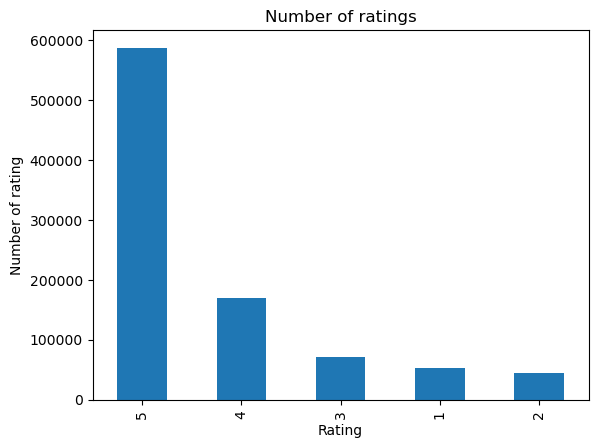

In [32]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of rating')
plt.title('Number of ratings')
plt.show()

In [33]:
rating_year = df.groupby('Year')['rating'].value_counts()
rating_year 

Year  rating
2017  5          17257
      4           4398
      3           1563
      2           1093
      1           1079
2018  5          66207
      4          15181
      3           6251
      1           5491
      2           4866
2019  5          90928
      4          24384
      3          10802
      1           9984
      2           7762
2020  5         128594
      4          42342
      3          18925
      1          13805
      2          11783
2021  5         128820
      4          38368
      3          15727
      1           9961
      2           9136
2022  5         123302
      4          37039
      3          14588
      1           9067
      2           8231
2023  5          31973
      4           8480
      3           3539
      1           3106
      2           2391
Name: count, dtype: int64

In [34]:
rating_year[2023]

rating
5    31973
4     8480
3     3539
1     3106
2     2391
Name: count, dtype: int64

In [35]:
rating_year[2022]

rating
5    123302
4     37039
3     14588
1      9067
2      8231
Name: count, dtype: int64

In [36]:
rating_year[2021]

rating
5    128820
4     38368
3     15727
1      9961
2      9136
Name: count, dtype: int64

In [37]:
rating_year[2020]

rating
5    128594
4     42342
3     18925
1     13805
2     11783
Name: count, dtype: int64

In [38]:
rating_year[2019]

rating
5    90928
4    24384
3    10802
1     9984
2     7762
Name: count, dtype: int64

In [39]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,1741593524,5,1.0,0,2,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
2,5061282401,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
3,6083038851,5,1.0,0,0,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20
4,47056667835,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20


In [40]:
df_num2= df.drop(columns=["review_text","review_title","product_id","product_name","brand_name"])

In [41]:
df_num2.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
0,1741593524,5,1.0,0,2,19.0,2023,2,1
1,31423088263,1,0.0,0,0,24.0,2023,3,21
2,5061282401,5,1.0,0,0,24.0,2023,3,21
3,6083038851,5,1.0,0,0,24.0,2023,3,20
4,47056667835,5,1.0,0,0,24.0,2023,3,20


In [42]:
df_num2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926423 entries, 0 to 1094410
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   author_id                 926423 non-null  object 
 1   rating                    926423 non-null  int64  
 2   is_recommended            926423 non-null  float64
 3   total_neg_feedback_count  926423 non-null  int64  
 4   total_pos_feedback_count  926423 non-null  int64  
 5   price_usd                 926423 non-null  float64
 6   Year                      926423 non-null  int32  
 7   Month                     926423 non-null  int32  
 8   Date                      926423 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object(1)
memory usage: 60.1+ MB


In [43]:
float_value = 12.34

# Convert to integer
int_value = int(float_value)

print(int_value)

12


In [44]:
df_num2['is_recommended'] = df['is_recommended'].astype(int)

df_num2.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
0,1741593524,5,1,0,2,19.0,2023,2,1
1,31423088263,1,0,0,0,24.0,2023,3,21
2,5061282401,5,1,0,0,24.0,2023,3,21
3,6083038851,5,1,0,0,24.0,2023,3,20
4,47056667835,5,1,0,0,24.0,2023,3,20


In [45]:
df_num2['price_usd'] = df['price_usd'].astype(float)

df_num2.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
0,1741593524,5,1,0,2,19.0,2023,2,1
1,31423088263,1,0,0,0,24.0,2023,3,21
2,5061282401,5,1,0,0,24.0,2023,3,21
3,6083038851,5,1,0,0,24.0,2023,3,20
4,47056667835,5,1,0,0,24.0,2023,3,20


In [46]:
df_number= df_num2.drop(columns="author_id")	

In [47]:
df_number.head()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
0,5,1,0,2,19.0,2023,2,1
1,1,0,0,0,24.0,2023,3,21
2,5,1,0,0,24.0,2023,3,21
3,5,1,0,0,24.0,2023,3,20
4,5,1,0,0,24.0,2023,3,20


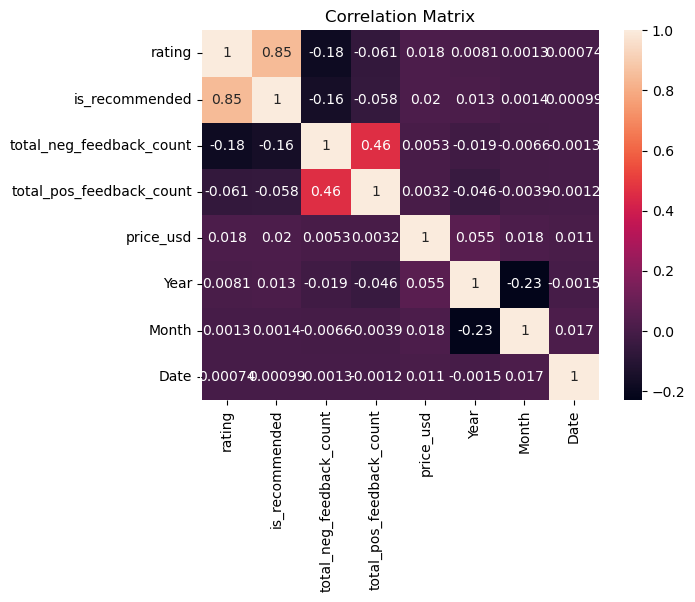

In [48]:
correlation_matrix = df_number.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [49]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date
0,1741593524,5,1.0,0,2,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
2,5061282401,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21
3,6083038851,5,1.0,0,0,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20
4,47056667835,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20


In [50]:
df['merged_review'] = df.apply(lambda row: f"{row['review_text']}, {row['review_title']}", axis=1)
print(df)

           author_id  rating  is_recommended  total_neg_feedback_count  \
0         1741593524       5             1.0                         0   
1        31423088263       1             0.0                         0   
2         5061282401       5             1.0                         0   
3         6083038851       5             1.0                         0   
4        47056667835       5             1.0                         0   
...              ...     ...             ...                       ...   
1094406   9109189891       5             1.0                         0   
1094407   8115925555       5             1.0                         0   
1094408  10723607564       5             1.0                         0   
1094409   5953458355       5             1.0                         0   
1094410  24486949963       5             1.0                         0   

         total_pos_feedback_count  \
0                               2   
1                               0   


In [51]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,review_text,review_title,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,0,2,I use this with the Nudestix âCitrus Clean B...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,0,0,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,0,0,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...
3,6083038851,5,1.0,0,0,Iâve always loved this formula for a long ti...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,0,0,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h..."


In [52]:
df = df.drop(columns="review_text")

In [53]:
df = df.drop(columns="review_title")

In [54]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,0,2,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...
3,6083038851,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h..."


In [55]:
df.shape

(926423, 13)

In [56]:
recommend = df.groupby('is_recommended')['total_pos_feedback_count'].value_counts()
recommend 

is_recommended  total_pos_feedback_count
0.0             0                           47881
                1                           17857
                2                           13621
                3                           10996
                4                            8977
                                            ...  
1.0             2414                            1
                2999                            1
                3110                            1
                3481                            1
                5050                            1
Name: count, Length: 819, dtype: int64

In [57]:
print(df["total_pos_feedback_count"])

0          2
1          0
2          0
3          0
4          0
          ..
1094406    0
1094407    0
1094408    0
1094409    0
1094410    0
Name: total_pos_feedback_count, Length: 926423, dtype: int64


In [58]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review
0,1741593524,5,1.0,0,2,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...
1,31423088263,1,0.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...
2,5061282401,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...
3,6083038851,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...
4,47056667835,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h..."


#  Calculate the Length of Each Review

In [59]:
df['review_length'] = df['merged_review'].apply(len)
print(df)

           author_id  rating  is_recommended  total_neg_feedback_count  \
0         1741593524       5             1.0                         0   
1        31423088263       1             0.0                         0   
2         5061282401       5             1.0                         0   
3         6083038851       5             1.0                         0   
4        47056667835       5             1.0                         0   
...              ...     ...             ...                       ...   
1094406   9109189891       5             1.0                         0   
1094407   8115925555       5             1.0                         0   
1094408  10723607564       5             1.0                         0   
1094409   5953458355       5             1.0                         0   
1094410  24486949963       5             1.0                         0   

         total_pos_feedback_count product_id  \
0                               2    P504322   
1              

# Categorize the Reviews

In [60]:
# Define the threshold for long and short reviews
threshold = 100

# Categorize the reviews
df['review_type'] = df['review_length'].apply(lambda x: 'long' if x > threshold else 'short')
print(df)

           author_id  rating  is_recommended  total_neg_feedback_count  \
0         1741593524       5             1.0                         0   
1        31423088263       1             0.0                         0   
2         5061282401       5             1.0                         0   
3         6083038851       5             1.0                         0   
4        47056667835       5             1.0                         0   
...              ...     ...             ...                       ...   
1094406   9109189891       5             1.0                         0   
1094407   8115925555       5             1.0                         0   
1094408  10723607564       5             1.0                         0   
1094409   5953458355       5             1.0                         0   
1094410  24486949963       5             1.0                         0   

         total_pos_feedback_count product_id  \
0                               2    P504322   
1              

In [61]:
# Count of long and short reviews
review_counts = df['review_type'].value_counts()
print(review_counts)

review_type
long     860929
short     65494
Name: count, dtype: int64


In [62]:
# Read in combines reviews file
filepathh= "D:/2024/NYP Applied Data Science/ITD 214/#Sephora Product and skincare reviews/heart.csv"
df2 = pd.read_csv(filepathh,encoding='latin-1')
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df2.shape

(303, 14)

In [64]:
df.to_csv("df_rating.csv")

In [65]:
df.head()

,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,1741593524,5,1.0,0,2,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,31423088263,1,0.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,5061282401,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,6083038851,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,47056667835,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


In [66]:
df_number.head()

,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,price_usd,Year,Month,Date
0,5,1,0,2,19.0,2023,2,1
1,1,0,0,0,24.0,2023,3,21
2,5,1,0,0,24.0,2023,3,21
3,5,1,0,0,24.0,2023,3,20
4,5,1,0,0,24.0,2023,3,20


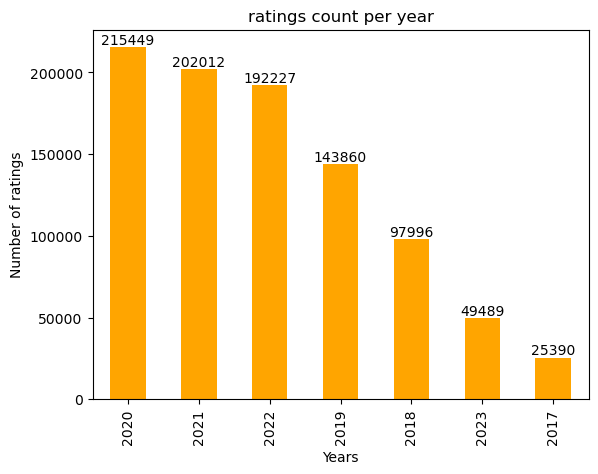

In [67]:
#year count bar graph
import matplotlib.pyplot as plt

# Create the bar plot
ax = df_number['Year'].value_counts().plot(kind='bar', color='orange')

# Label the bars with the counts
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the labels and title
plt.xlabel('Years')
plt.ylabel('Number of ratings')
plt.title('ratings count per year')

# Show the plot
plt.show()

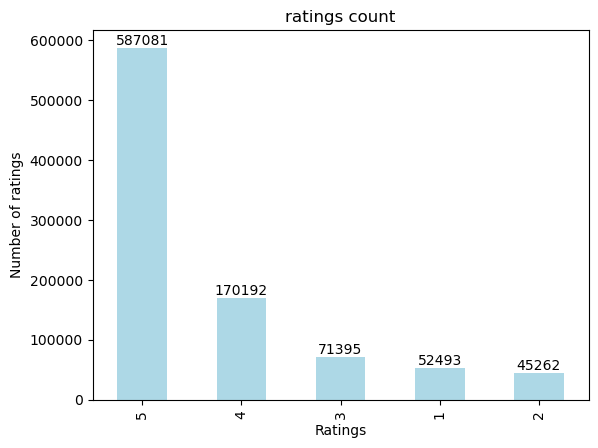

In [68]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = df_number['rating'].value_counts().plot(kind='bar', color='lightblue')

# Label the bars with the counts
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the labels and title
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.title('ratings count')

# Show the plot
plt.show()

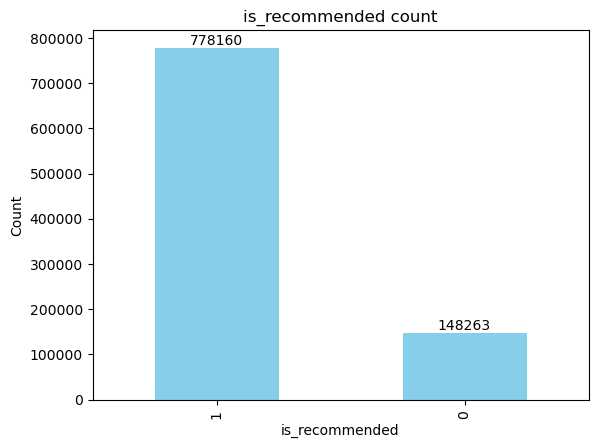

In [69]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = df_number['is_recommended'].value_counts().plot(kind='bar', color='skyblue')

# Label the bars with the counts
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the labels and title
plt.xlabel('is_recommended')
plt.ylabel('Count')
plt.title('is_recommended count')

# Show the plot
plt.show()

- Group by rating and brand name

In [70]:
group_rateproduct = df.groupby(['rating', 'product_name']).count().reset_index()
group_rateproduct.rename(columns={'transaction id': 'transaction count'}, inplace=True)

In [71]:
group_rateprice = df.groupby(['rating', 'price_usd']).count().reset_index()
group_rateprice.rename(columns={'price_usd': 'transaction count'}, inplace=True)

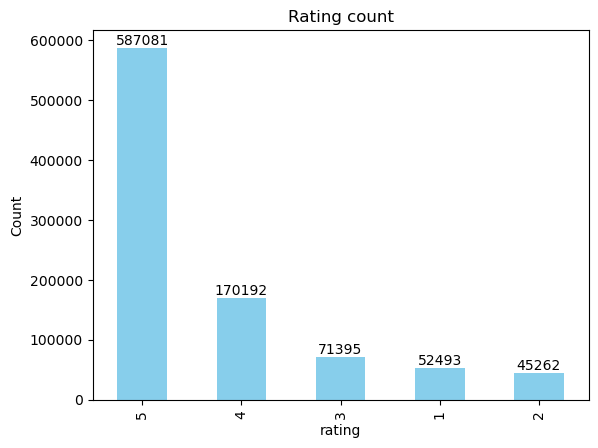

In [72]:
import matplotlib.pyplot as plt

# Create the bar plot
ax = df_number['rating'].value_counts().plot(kind='bar', color='skyblue')

# Label the bars with the counts
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Set the labels and title
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Rating count')

# Show the plot
plt.show()

In [73]:
import pandas as pd

# Assuming your DataFrame is named df and has 'rating' and 'price' columns
# Group by rating and calculate the mean price
rating_price_relation = df_number.groupby('rating')['price_usd'].mean().reset_index()

# Display the relationship
print(rating_price_relation)

   rating  price_usd
0       1  46.337757
1       2  46.350129
2       3  50.428426
3       4  52.532645
4       5  49.878500


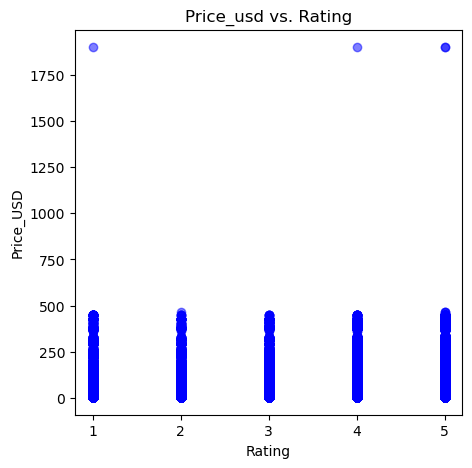

In [74]:
# Scatter plot of price_usd vs. rating
plt.figure(figsize=(5, 5))
plt.scatter(df['rating'], df['price_usd'], alpha=0.5, color='blue')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Price_USD')
plt.title('Price_usd vs. Rating')

# Setting x-axis ticks to show all ratings from 1 to 5
plt.xticks([1, 2, 3, 4, 5])

# Show the plot
plt.show()

# Linear regression model

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example DataFrame
data = df_number
df_LR = pd.DataFrame(data)

# Prepare data

- Features (X): ratings, is_recommended, feedback_count
- Target (y): ratings

In [76]:
# Define features and target
X = df[['total_pos_feedback_count', 'is_recommended']]
y = df['rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model

In [77]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

# Make predictions on the test data

In [78]:
y_pred = model.predict(X_test)

# Evaluate the Model

In [79]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.3822989764223277
R^2 Score: 0.7130673474300636


# Print the coefficients

In [80]:
# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
total_pos_feedback_count    -0.000653
is_recommended               2.660358


# Optional - Visualize the Results

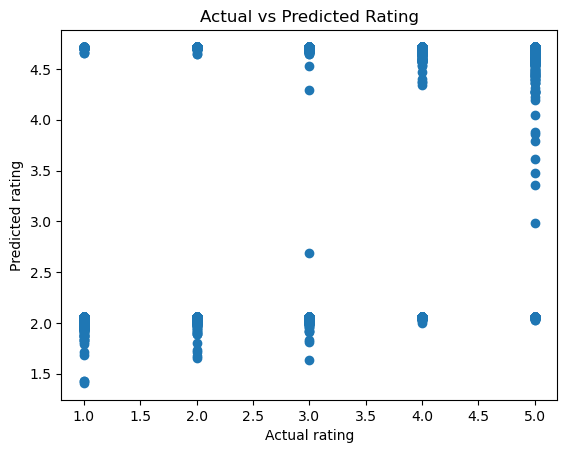

In [81]:
import matplotlib.pyplot as plt

# Plot actual vs predicted feedback count
plt.scatter(y_test, y_pred)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.title('Actual vs Predicted Rating')
plt.show()

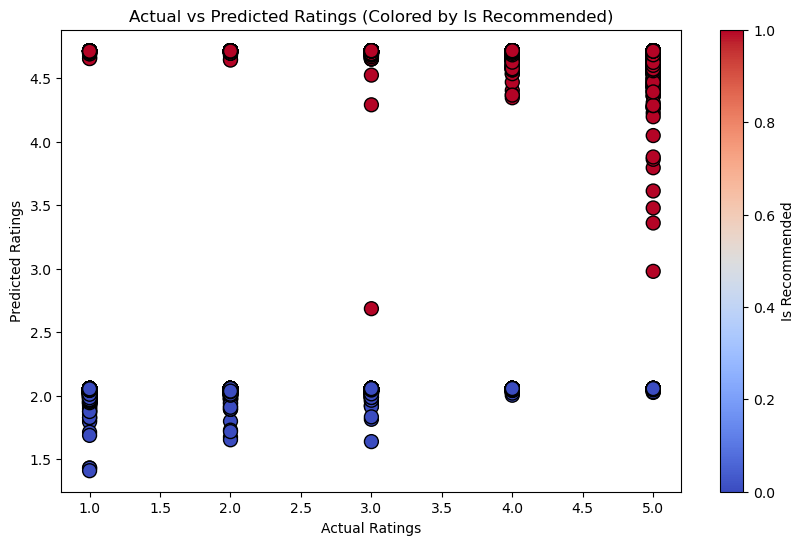

In [82]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Scatter plot with colors based on `is_recommended`
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, c=X_test['is_recommended'], cmap='coolwarm', edgecolor='k', s=100)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Is Recommended')

# Labeling the plot
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Colored by Is Recommended)')

# Show the plot
plt.show()

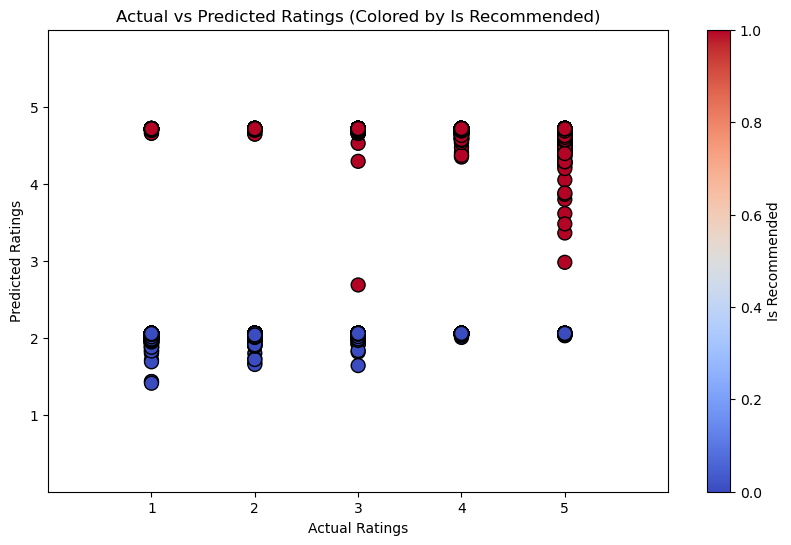

In [83]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Scatter plot with colors based on `is_recommended`
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, c=X_test['is_recommended'], cmap='coolwarm', edgecolor='k', s=100)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Is Recommended')

# Set the limits for the x-axis and y-axis to be between 1 and 5
plt.xlim(0, 6)
plt.ylim(0, 6)

# Set the ticks to be integers from 1 to 5
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5])

# Labeling the plot
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Colored by Is Recommended)')

# Show the plot
plt.show()

In [84]:
df["is_recommended"].head(30)

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
5     1.0
6     0.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
14    0.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    0.0
21    0.0
22    1.0
23    1.0
24    0.0
25    1.0
26    1.0
27    0.0
28    1.0
29    1.0
Name: is_recommended, dtype: float64

# Random forest model

# Import Libraries and Prepare Data

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'rating', 'is_recommended', and 'total_pos_feedback_count' columns
# Define features (X) and target variable (y)
X = df[['is_recommended', 'total_pos_feedback_count']]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model

In [86]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make Predictions and Evaluate the Model

In [87]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.36951250949923753
R-squared: 0.7226641684981562


# Visualize the Results

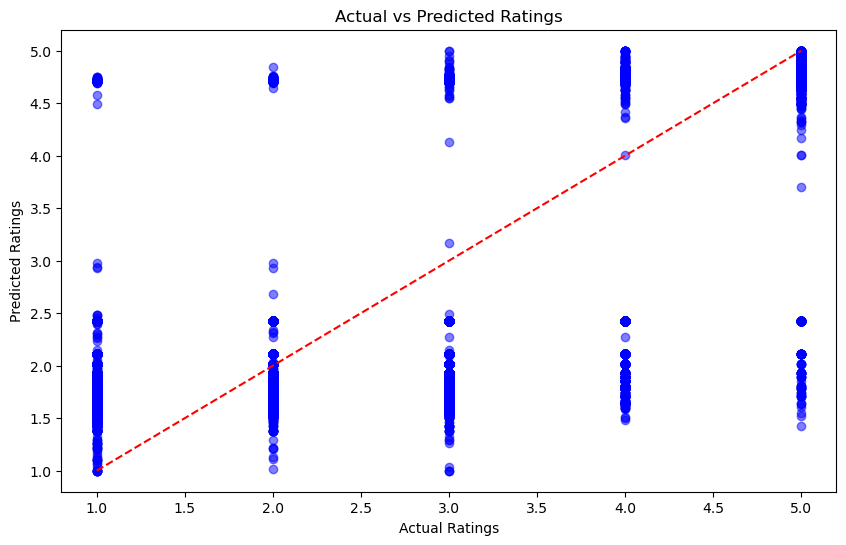

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Feature Importance Visualization

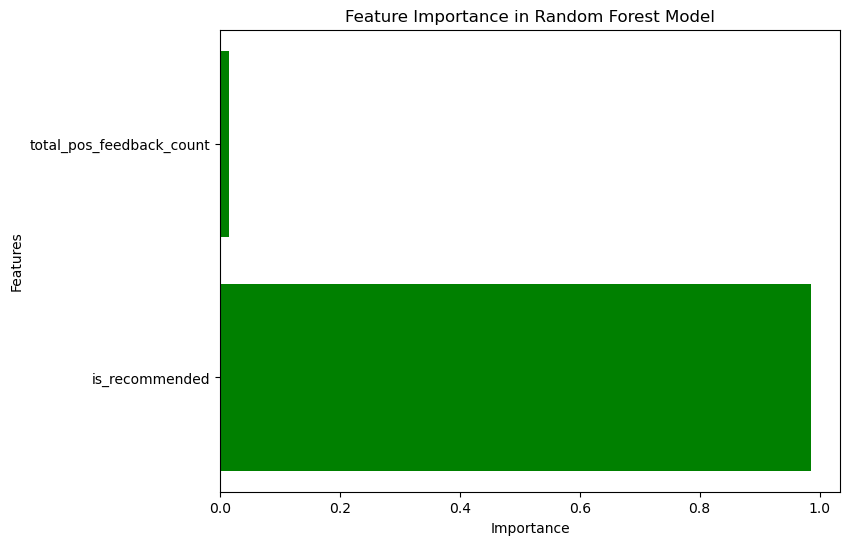

In [89]:
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='green')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Decision Tree Model

# Import Libraries and Prepare Data

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'rating', 'is_recommended', and 'total_pos_feedback_count' columns
# Define features (X) and target variable (y)
X = df[['is_recommended', 'total_pos_feedback_count']]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

In [91]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Prediction & evaluation

In [92]:
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3695989049427448
R-squared: 0.7225993248147975


# Visualize the results

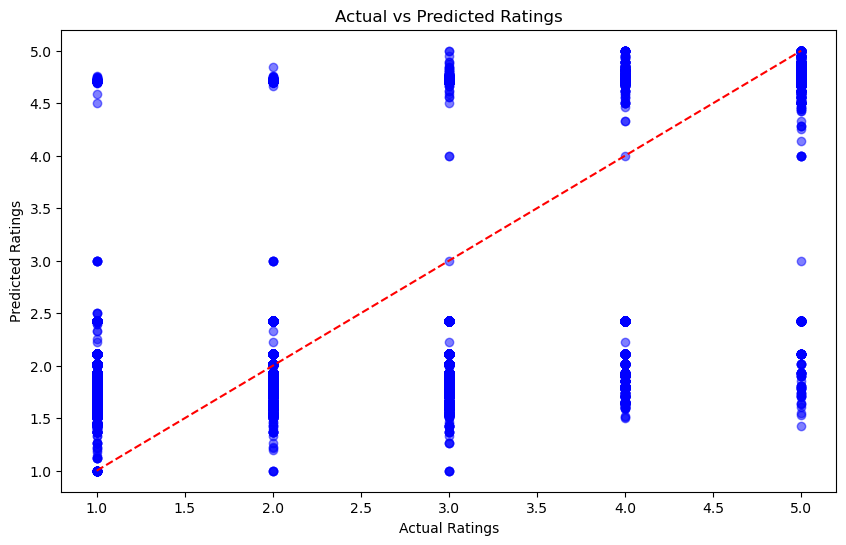

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Feature importance variation

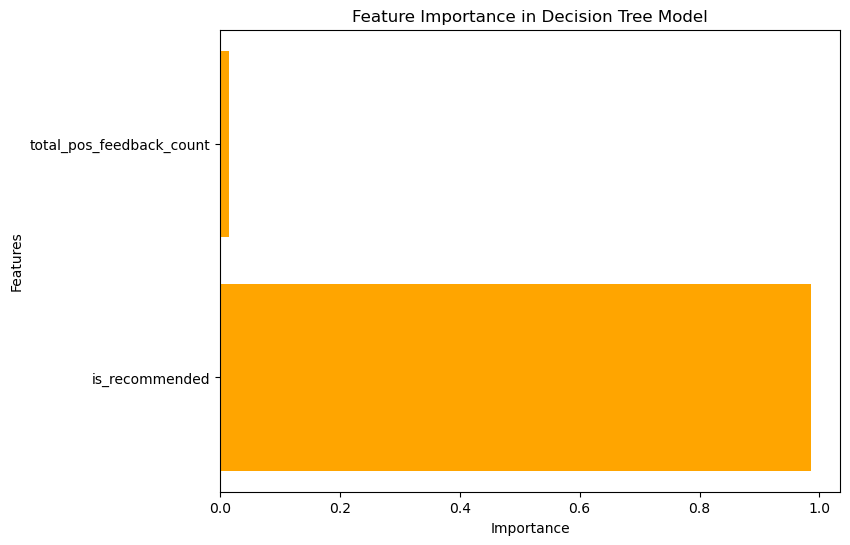

In [94]:
# Get feature importances
importances = dt_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

# MODELLING

In [7]:
import pandas as pd

In [10]:
df_model1 = pd.read_csv('df_rating.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df_rating.csv'

In [18]:
df_model

,Unnamed: 0,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,0,2,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926418,1094406,9109189891,5,1.0,0,0,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,4,29,I LOVE this stuff! It works amazingly well at ...,257,long
926419,1094407,8115925555,5,1.0,0,0,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,4,29,love this micellar water from Milk! it removes...,213,long
926420,1094408,10723607564,5,1.0,0,0,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,4,29,I loveeeeee Milk!!! Just discovered this brand...,216,long
926421,1094409,5953458355,5,1.0,0,0,P500101,Hydro Ungrip Makeup Remover + Cleansing Water,MILK MAKEUP,32.0,2022,4,29,"My new favorite makeup remover. First of all, ...",413,long


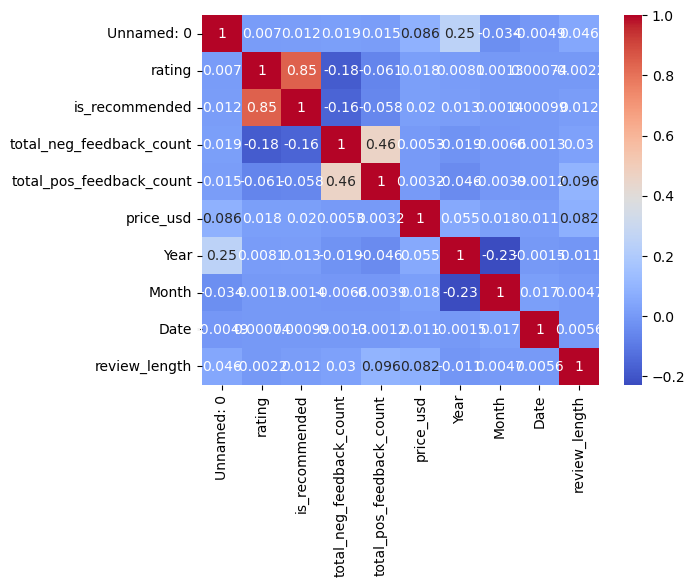

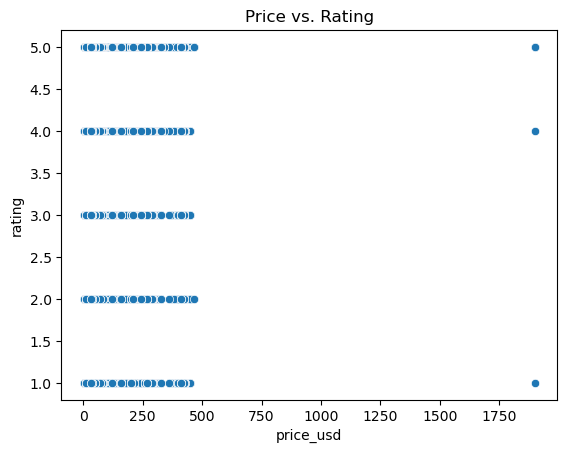

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_model

# Convert price and rating columns to numeric, handle non-numeric issues
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with missing or NaN values in price or rating
df.dropna(subset=['price_usd', 'rating'], inplace=True)

# Correlation Matrix (only include numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter Plot: Price vs. Rating
sns.scatterplot(x='price_usd', y='rating', data=df)
plt.title('Price vs. Rating')
plt.show()

In [25]:
df_model.isnull().sum()

Unnamed: 0                  0
author_id                   0
rating                      0
is_recommended              0
total_neg_feedback_count    0
total_pos_feedback_count    0
product_id                  0
product_name                0
brand_name                  0
price_usd                   0
Year                        0
Month                       0
Date                        0
merged_review               0
review_length               0
review_type                 0
dtype: int64

#Rating by product id

In [26]:
df_model.head()

,Unnamed: 0,author_id,rating,is_recommended,total_neg_feedback_count,total_pos_feedback_count,product_id,product_name,brand_name,price_usd,Year,Month,Date,merged_review,review_length,review_type
0,0,1741593524,5,1.0,0,2,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,2023,2,1,I use this with the Nudestix âCitrus Clean B...,497,long
1,1,31423088263,1,0.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,I bought this lip mask after reading the revie...,176,long
2,2,5061282401,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,21,My review title says it all! I get so excited ...,294,long
3,3,6083038851,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,Iâve always loved this formula for a long ti...,267,long
4,4,47056667835,5,1.0,0,0,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,2023,3,20,"If you have dry cracked lips, this is a must h...",230,long


#all products with a rating of 3

In [29]:
import pandas as pd

# Load your dataset
df_model

# Specify the rating you want to filter by
rating_to_filter = 3

# Filter the DataFrame by the rating
filtered_df = df.loc[df['rating'] == rating_to_filter]

# Display the product name, product ID, and rating
print(filtered_df[['product_name', 'product_id', 'rating']])

                                             product_name product_id  rating
14      Lip Sleeping Mask Intense Hydration with Vitam...    P420652       3
17      Lip Sleeping Mask Intense Hydration with Vitam...    P420652       3
45      Lip Sleeping Mask Intense Hydration with Vitam...    P420652       3
55      Lip Sleeping Mask Intense Hydration with Vitam...    P420652       3
70      Lip Sleeping Mask Intense Hydration with Vitam...    P420652       3
...                                                   ...        ...     ...
926284      Hydro Ungrip Makeup Remover + Cleansing Water    P500101       3
926291      Hydro Ungrip Makeup Remover + Cleansing Water    P500101       3
926297      Hydro Ungrip Makeup Remover + Cleansing Water    P500101       3
926333      Hydro Ungrip Makeup Remover + Cleansing Water    P500101       3
926334      Hydro Ungrip Makeup Remover + Cleansing Water    P500101       3

[71395 rows x 3 columns]


#reviews with a rating of 3

In [30]:
import pandas as pd

# Load your dataset
df_model

# Specify the rating you want to filter by
rating_to_filter = 3

# Filter the DataFrame by the rating
filtered_df = df.loc[df['rating'] == rating_to_filter]

# Display the review, product name, and rating
print(filtered_df[['merged_review', 'product_name', 'rating']])

                                            merged_review  \
14      Does the gummy bear mask smell absolutely deli...   
17      Itâs super glossy and looks amazing but does...   
45      ive tried my friendâs a few times and it doe...   
55      This product is marketed as a sleeping mask bu...   
70      I think this is overpriced for what it is - li...   
...                                                   ...   
926284  It works well, but I can feel burning while us...   
926291  This product works ok. Itâs smells horrible....   
926297  I wanted to like this product for the ease of ...   
926333  I was excited to try this one but unfortunatel...   
926334  This makeup remover is great because it doesnâ...   

                                             product_name  rating  
14      Lip Sleeping Mask Intense Hydration with Vitam...       3  
17      Lip Sleeping Mask Intense Hydration with Vitam...       3  
45      Lip Sleeping Mask Intense Hydration with Vitam...      

In [1]:
#This shows the count of reviews for each rating.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_model

# Count the number of reviews for each rating
rating_counts = df['rating'].value_counts().sort_index()

# Plot a bar graph
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

NameError: name 'df_model' is not defined